# Online Retail K-Means & Hierarchical Clustering Project

#### by Omar Mahmoud                        
Date:28/7/2023

In [3]:
#importing needed liberaries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [4]:
df = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Preprocessing 

- Missing values in `CustomerID`, `Description `
- `Quantity` and `Unit Price` Negative values and Outliers

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
df['CustomerID'] = df['CustomerID'].astype('str')

In [11]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [12]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [13]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [15]:
pd.DataFrame(df.groupby("CustomerID")[['Total Price', 'Quantity']].sum())

,Total Price,Quantity
CustomerID,,
12346.0,0.00,0
12347.0,4310.00,2458
12348.0,1797.24,2341
12349.0,1757.55,631
12350.0,334.40,197
...,...,...
18280.0,180.60,45
18281.0,80.82,54
18282.0,176.60,98


# Feature Engineering

In [16]:
#grouping the data by the Customer ID 
customer_group = pd.DataFrame(df.groupby("CustomerID")['Total Price'].sum()).reset_index()

In [17]:
#making a new feature called frequency to know how many times the customers visit our site
customer_group['Frequency'] = df.groupby("CustomerID")['InvoiceNo'].count().reset_index()['InvoiceNo']

In [18]:
customer_group.head()

,CustomerID,Total Price,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [19]:
#creating another feature to detict when was the last time each cutomer bought something from our site
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
latest_purchase = df["InvoiceDate"].max()
df['DateDifference'] = latest_purchase - df['InvoiceDate']

In [20]:
pd.DataFrame(df.groupby("CustomerID")["DateDifference"].min()).reset_index()['DateDifference']

0      326 days 07:02:00
1       40 days 04:54:00
2       76 days 04:06:00
3       19 days 07:28:00
4      311 days 01:18:00
              ...       
4367   160 days 07:27:00
4368     4 days 06:26:00
4369    93 days 02:09:00
4370    10 days 04:20:00
4371     0 days 06:56:00
Name: DateDifference, Length: 4372, dtype: timedelta64[ns]

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,DateDifference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00


In [22]:
customer_group["Last Purchase"] = pd.DataFrame(df.groupby("CustomerID")["DateDifference"].min()).reset_index()['DateDifference']

In [23]:
customer_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   CustomerID     4372 non-null   object         
 1   Total Price    4372 non-null   float64        
 2   Frequency      4372 non-null   int64          
 3   Last Purchase  4372 non-null   timedelta64[ns]
dtypes: float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 136.8+ KB


In [24]:
customer_group["Last Purchase"] = customer_group["Last Purchase"].dt.days

In [25]:
customer_group.head()

,CustomerID,Total Price,Frequency,Last Purchase
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


### As we can see that the Country feature almost be a united Kingdom 
### so i decided to create a new feature called IS_UK so it can help me in clustring 

<Axes: xlabel='count', ylabel='Country'>

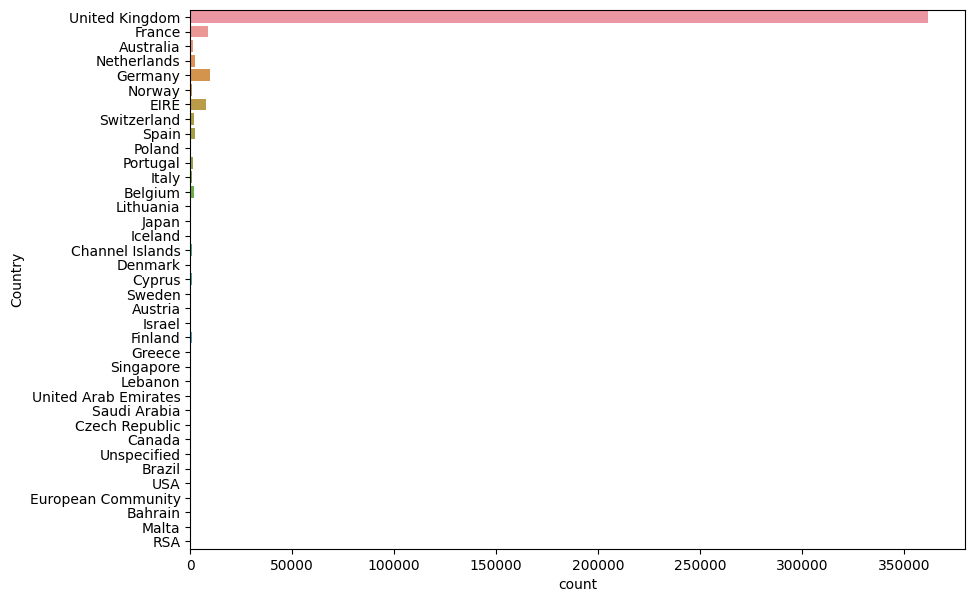

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(y='Country', data=df)

In [27]:
df2 = df.copy()

In [28]:
df["IS_UK"] = df["Country"] == "United Kingdom"

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,DateDifference,IS_UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00,True
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00,True


<Axes: xlabel='IS_UK', ylabel='count'>

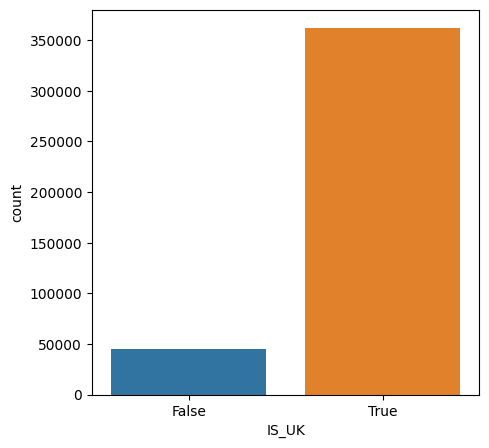

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x='IS_UK', data=df)

In [31]:
customer_group["IS_UK"] = pd.DataFrame(df.groupby("CustomerID")["IS_UK"].min()).reset_index()['IS_UK']

In [32]:
customer_group.head()

,CustomerID,Total Price,Frequency,Last Purchase,IS_UK
0,12346.0,0.00,2,326,True
1,12347.0,4310.00,182,40,False
2,12348.0,1797.24,31,76,False
3,12349.0,1757.55,73,19,False
4,12350.0,334.40,17,311,False


<Axes: xlabel='IS_UK', ylabel='count'>

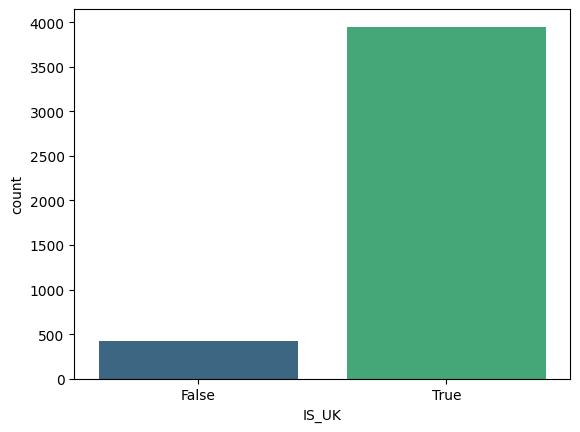

In [33]:
sns.countplot(data = customer_group, x = "IS_UK", palette="viridis")

<Axes: xlabel='IS_UK', ylabel='Total Price'>

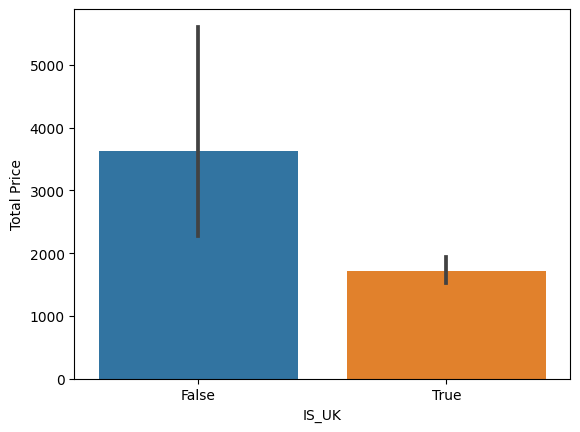

In [34]:
sns.barplot(data = customer_group, x = 'IS_UK', y = "Total Price")

#### as we can see that feature like this might help us clustering the customers

# we need to standerize the feature because it have a huge variance in values 

### we will use the StanderedScaler

In [35]:
customer_group.describe()

,Total Price,Frequency,Last Purchase
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,100.947850
std,8219.345141,232.471608,113.928875
min,-4287.630000,1.000000,0.000000
25%,293.362500,17.000000,20.000000
50%,648.075000,42.000000,57.000000
75%,1611.725000,102.000000,152.000000
max,279489.020000,7983.000000,697.000000


In [36]:
#we already imported the StanderdScaler
scaler = StandardScaler()

customer_group[['Total Price','Frequency', 'Last Purchase']] = scaler.fit_transform(customer_group[['Total Price','Frequency', 'Last Purchase']])

In [37]:
customer_group.head()

,CustomerID,Total Price,Frequency,Last Purchase,IS_UK
0,12346.0,-0.231001,-0.391720,1.975600,True
1,12347.0,0.293432,0.382657,-0.535025,False
2,12348.0,-0.012316,-0.266959,-0.219002,False
3,12349.0,-0.017146,-0.086271,-0.719372,False
4,12350.0,-0.190312,-0.327188,1.843924,False


In [38]:
copy_df = customer_group.copy()

In [39]:
us_mapping = {
    False : 0,
    True : 1 
    }

In [40]:
copy_df['IS_UK'] = copy_df['IS_UK'].map(us_mapping)
copy_df.head()

,CustomerID,Total Price,Frequency,Last Purchase,IS_UK
0,12346.0,-0.231001,-0.391720,1.975600,1
1,12347.0,0.293432,0.382657,-0.535025,0
2,12348.0,-0.012316,-0.266959,-0.219002,0
3,12349.0,-0.017146,-0.086271,-0.719372,0
4,12350.0,-0.190312,-0.327188,1.843924,0


In [41]:
final_df = copy_df.drop(columns=['CustomerID'])
final_df.head()

,Total Price,Frequency,Last Purchase,IS_UK
0,-0.231001,-0.391720,1.975600,1
1,0.293432,0.382657,-0.535025,0
2,-0.012316,-0.266959,-0.219002,0
3,-0.017146,-0.086271,-0.719372,0
4,-0.190312,-0.327188,1.843924,0


In [42]:
#k_means model 
kmeans = KMeans(4)

kmeans.fit(final_df)

c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [43]:
kmeans.predict(final_df)

array([2, 0, 0, ..., 0, 0, 0])

In [44]:
kmeans.inertia_

4901.067950359722

In [45]:
clusters = []
inertia = []
for cluster in range(2,11):
    kmeans = KMeans(cluster)
    kmeans.fit(final_df)
    clusters.append(cluster)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(final_df, kmeans.labels_)
    print(f"for k : {cluster} silhouette_score :{sil_score}")



c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 2 silhouette_score :0.9330373296195064


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 3 silhouette_score :0.5242289013281647


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 4 silhouette_score :0.522045003667111


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 5 silhouette_score :0.5410420494917825


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 6 silhouette_score :0.5327702039434895


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 7 silhouette_score :0.525582112317842


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 8 silhouette_score :0.4294413699001707


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 9 silhouette_score :0.4297090880070183


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 10 silhouette_score :0.47790149104679175


In [46]:
clusters 

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [47]:
inertia

[9369.829765517454,
 6289.895312298822,
 4894.69689746798,
 3819.921338063015,
 3138.088275714744,
 2528.4198434275745,
 2182.381311133007,
 1941.1442262634591,
 1717.7010419194928]

# plotting Elbow Curve to detect best number of clusters 

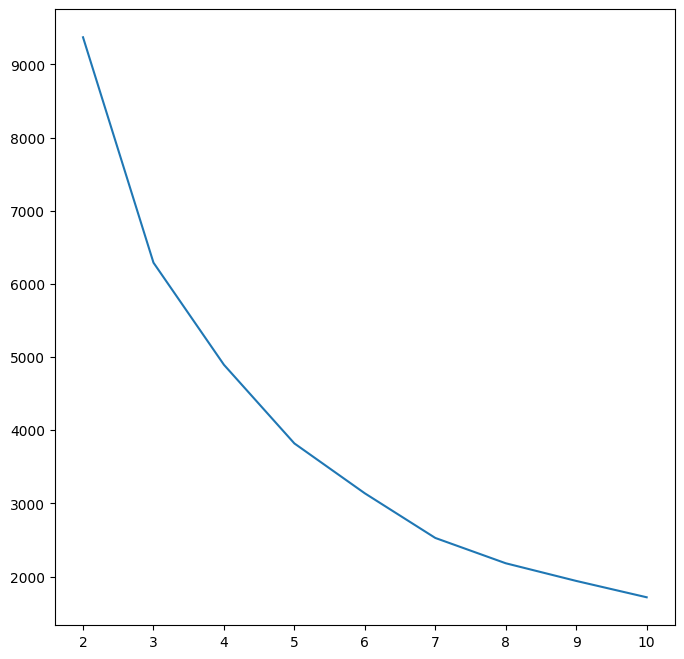

In [48]:
plt.figure(figsize=(8,8))
plt.plot(clusters,inertia)
plt.show()

### from the above curve we found that k = 3 is the best choice

In [49]:
kmeans = KMeans(3)

In [50]:
kmeans.fit(final_df)
kmeans.labels_

c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0])

In [51]:
silhouette_score(final_df, kmeans.labels_)

0.5240435003918544

In [52]:
customer_group['ClusterID'] = kmeans.labels_
customer_group.head()

,CustomerID,Total Price,Frequency,Last Purchase,IS_UK,ClusterID
0,12346.0,-0.231001,-0.391720,1.975600,True,1
1,12347.0,0.293432,0.382657,-0.535025,False,0
2,12348.0,-0.012316,-0.266959,-0.219002,False,0
3,12349.0,-0.017146,-0.086271,-0.719372,False,0
4,12350.0,-0.190312,-0.327188,1.843924,False,1


<Axes: xlabel='ClusterID', ylabel='Total Price'>

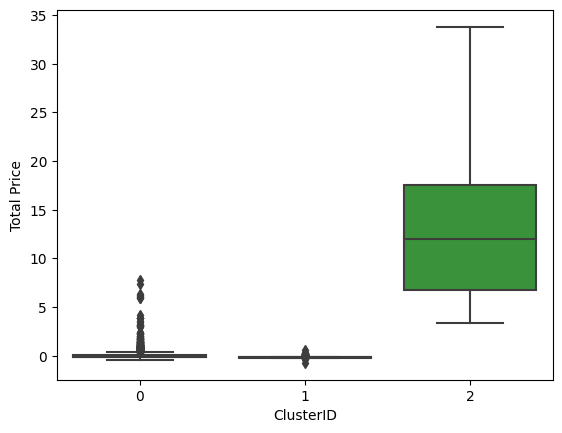

In [53]:
sns.boxplot(data = customer_group, x = 'ClusterID', y = 'Total Price')

<Axes: xlabel='ClusterID', ylabel='Frequency'>

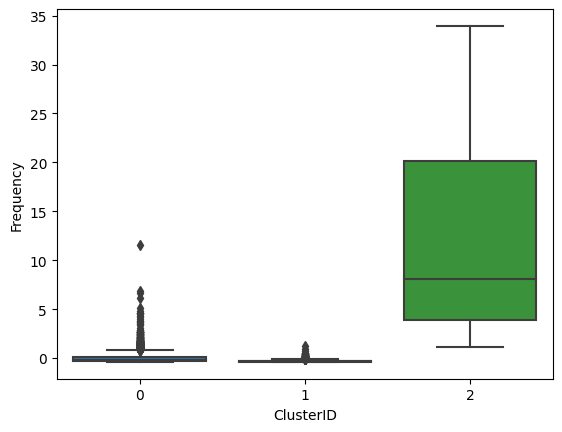

In [54]:
sns.boxplot(data = customer_group, x = 'ClusterID', y = 'Frequency') 

<Axes: xlabel='ClusterID', ylabel='Last Purchase'>

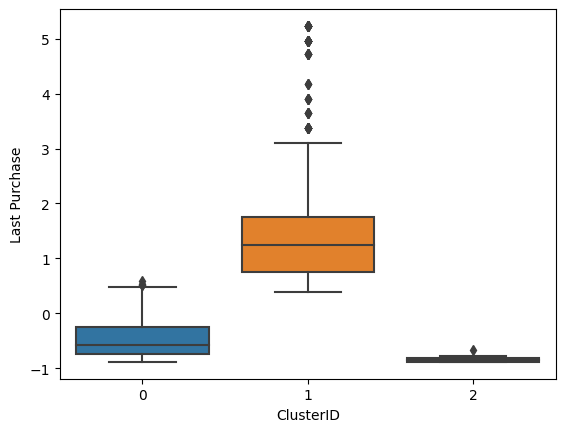

In [55]:
sns.boxplot(data = customer_group, x = 'ClusterID', y = 'Last Purchase') 

### Hierarchical Clustring 

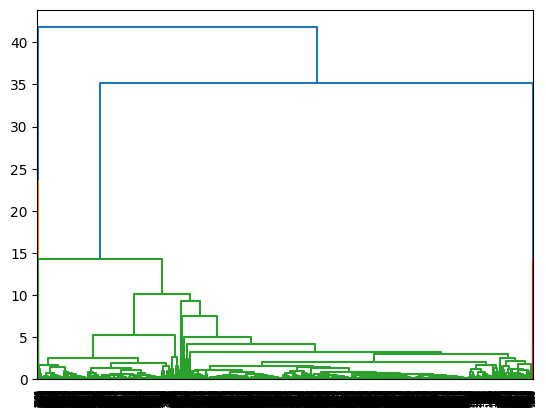

In [56]:
mergings = sch.linkage(final_df, method='complete', metric='euclidean')
sch.dendrogram(mergings)
plt.show()

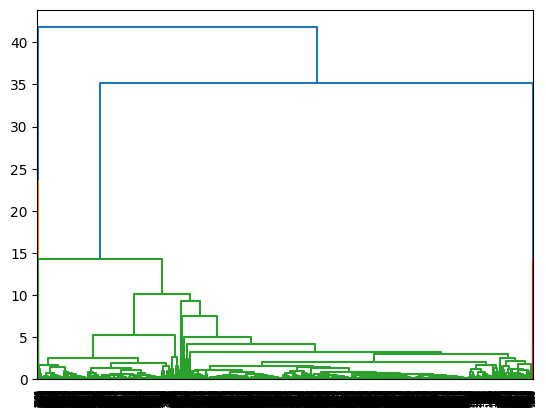

In [57]:
dendrogram = sch.dendrogram(sch.linkage(final_df, method='complete'))

In [59]:
cluster_labels = sch.cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
customer_group['ClusterID'] = cluster_labels
customer_group.head()

,CustomerID,Total Price,Frequency,Last Purchase,IS_UK,ClusterID
0,12346.0,-0.231001,-0.391720,1.975600,True,0
1,12347.0,0.293432,0.382657,-0.535025,False,0
2,12348.0,-0.012316,-0.266959,-0.219002,False,0
3,12349.0,-0.017146,-0.086271,-0.719372,False,0
4,12350.0,-0.190312,-0.327188,1.843924,False,0


<Axes: xlabel='ClusterID', ylabel='Total Price'>

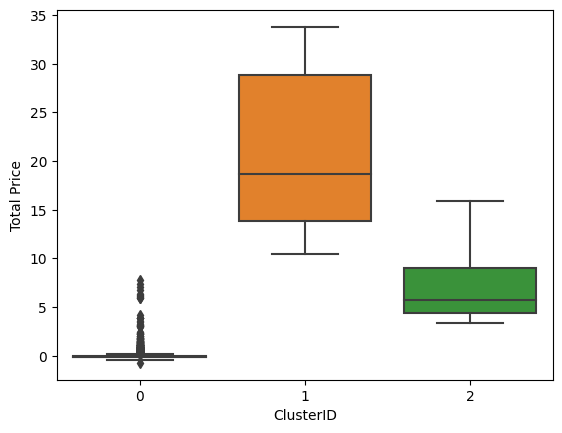

In [64]:
sns.boxplot(data = customer_group, x = 'ClusterID', y = 'Total Price')

<Axes: xlabel='ClusterID', ylabel='Frequency'>

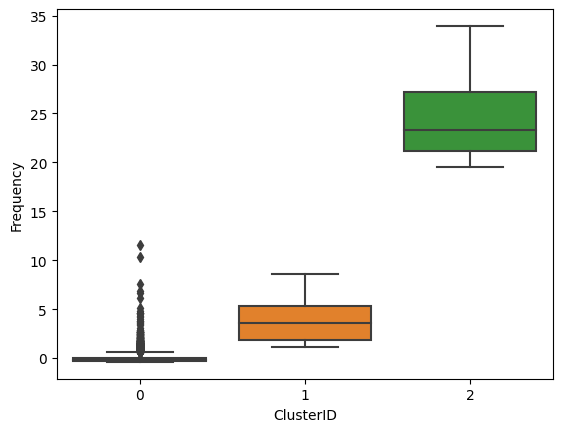

In [65]:
sns.boxplot(data = customer_group, x = 'ClusterID', y = 'Frequency')

<Axes: xlabel='ClusterID', ylabel='Last Purchase'>

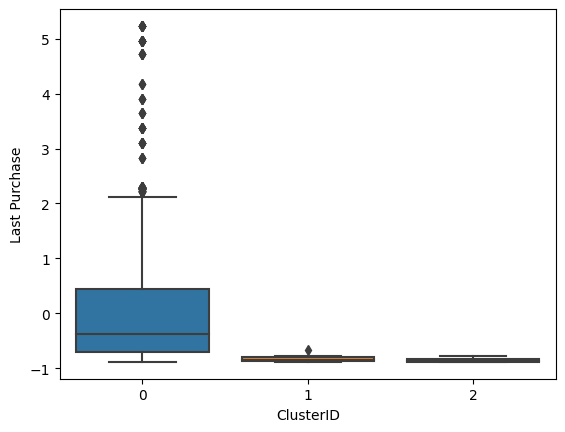

In [66]:
sns.boxplot(data = customer_group, x = 'ClusterID', y = 'Last Purchase')